# 500-Person-Gender-Height-Weight-Body-Mass-Index

This is a fairly straightforward problem and is ideal for people starting off with data science. It is a regression problem. The dataset has 500 rows and 4 columns (Gender, index, height and weight).

Gender : Male / Female
  
  Height : Number (cm)

  Weight : Number (Kg)
  
  Index :  
        
        0 - Extremely Weak 
        
        1 - Weak
        
        2 - Normal  
        
        3 - Overweight  
        
        4 - Obesity  
        
        5 - Extreme Obesity

In [3]:
#importing data Analysis library
import numpy as np
import pandas as pd

In [4]:
#importing data visualization library
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
sns.set_style('whitegrid')

In [6]:
#read the data
df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

In [7]:
#check the head
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender    500 non-null object
Height    500 non-null int64
Weight    500 non-null int64
Index     500 non-null int64
dtypes: int64(3), object(1)
memory usage: 13.7+ KB


In [9]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


c:\python 3.6.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


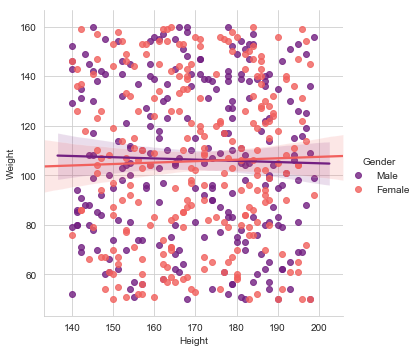

In [10]:
sns.lmplot(x='Height', y='Weight', data=df, hue='Gender', palette='magma', markers='o', sharex=True)

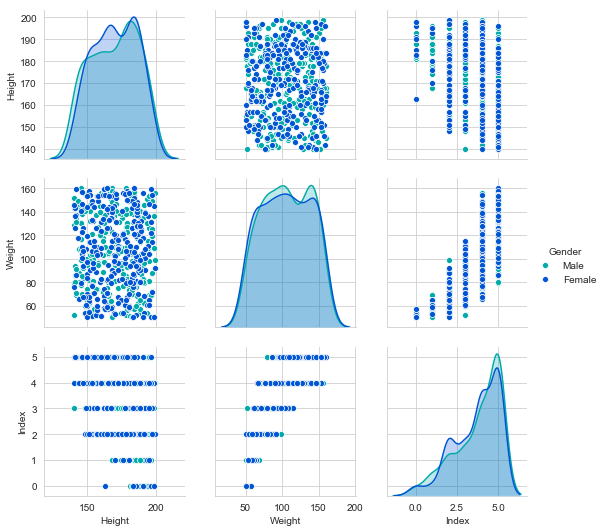

In [11]:
sns.pairplot(df, hue='Gender', palette='winter_r')

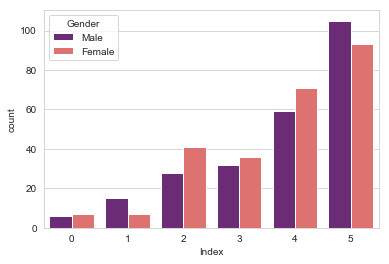

In [12]:
sns.countplot(x='Index', hue='Gender', data=df, palette='magma')

c:\python 3.6.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


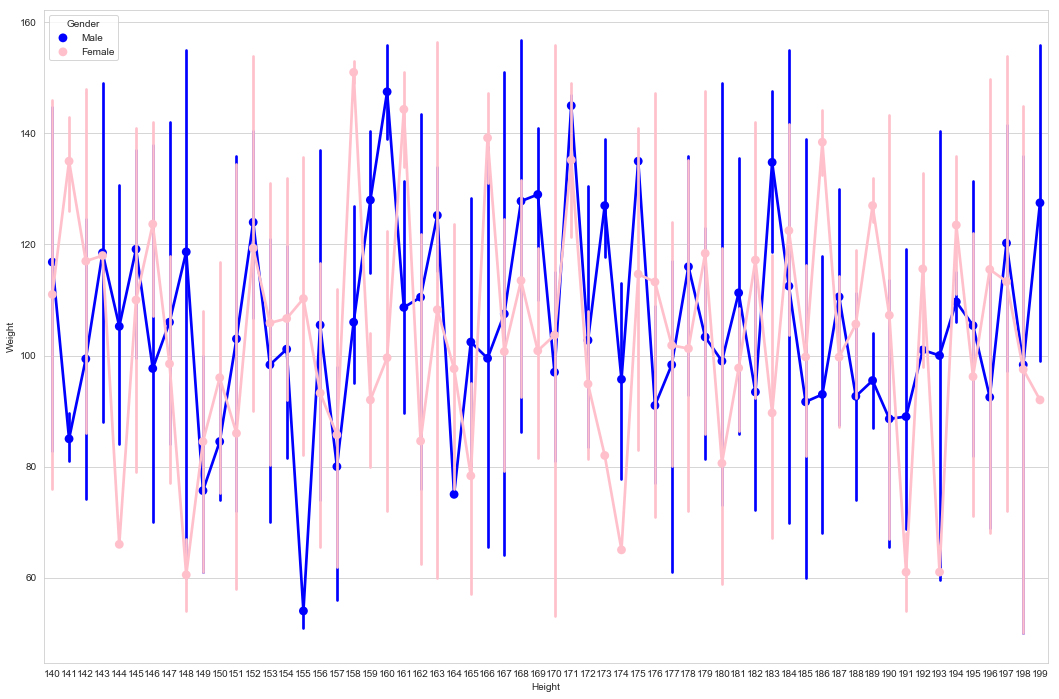

In [13]:
plt.figure(figsize=(18,12))
sns.pointplot(x='Height', y='Weight', data=df, hue='Gender', palette={'Male':'blue','Female':'pink'})

c:\python 3.6.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


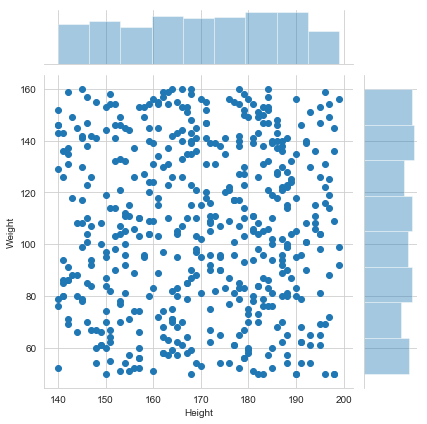

In [14]:
sns.jointplot(x='Height', y='Weight', data=df)

c:\python 3.6.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


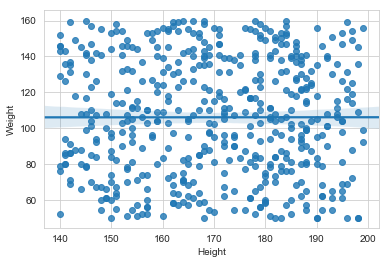

In [15]:
sns.regplot(x='Height', y='Weight', data=df)

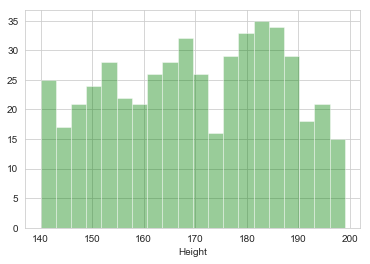

In [16]:
sns.distplot(df['Height'].dropna(), kde=False, bins=20, color='Green')

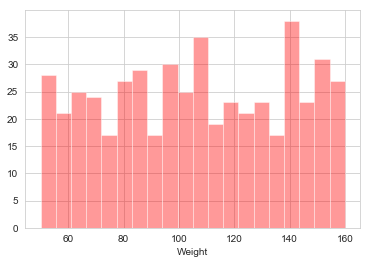

In [17]:
sns.distplot(df['Weight'].dropna(), kde=False, bins=20, color='red')

In [18]:
df.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


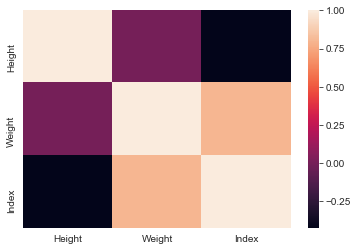

In [19]:
sns.heatmap(df.corr())

# Cleaning Data 

In [20]:
sex = pd.get_dummies(df['Gender'], drop_first=True)

In [21]:
sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [22]:
df = pd.concat([df,sex], axis=1)

In [23]:
df.head()

,Gender,Height,Weight,Index,Male
0,Male,174,96,4,1
1,Male,189,87,2,1
2,Female,185,110,4,0
3,Female,195,104,3,0
4,Male,149,61,3,1


# Train-Test_split

In [24]:
from sklearn.cross_validation import train_test_split

c:\python 3.6.5\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
df.columns

Index(['Gender', 'Height', 'Weight', 'Index', 'Male'], dtype='object')

In [58]:
#depending on X features we are predicting y 
X = df[['Weight', 'Index', 'Height']]
y = df['Male']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [60]:
#X_train[:5]

In [90]:
#X_test[:5]

# train test slpit

In [64]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression()

In [69]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
pre = lr.predict(X_test)

In [71]:
pre[1:6]

array([1, 1, 1, 0, 1], dtype=uint8)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
print(classification_report(y_test, pre))
print(confusion_matrix(y_test, pre))

             precision    recall  f1-score   support

          0       0.50      0.33      0.40       106
          1       0.45      0.63      0.53        94

avg / total       0.48      0.47      0.46       200

[[35 71]
 [35 59]]


# KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn = KNeighborsClassifier(n_neighbors=16)

In [94]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')

In [95]:
prdc = knn.predict(X_test)

In [96]:
print(classification_report(y_test, prdc))

             precision    recall  f1-score   support

          0       0.58      0.68      0.63       106
          1       0.55      0.45      0.49        94

avg / total       0.57      0.57      0.56       200



In [97]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

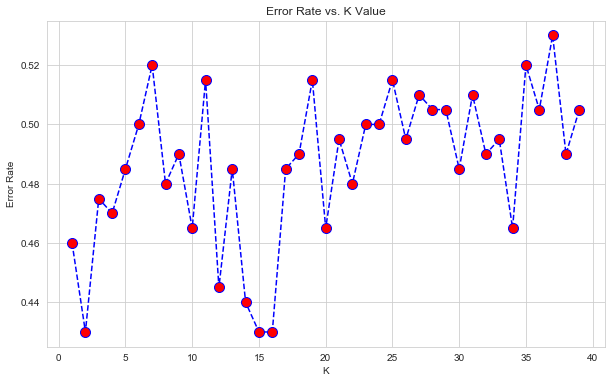

In [98]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [100]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
prdc = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,prdc))
print('\n')
print(classification_report(y_test,prdc))

WITH K=1


[[62 44]
 [48 46]]


             precision    recall  f1-score   support

          0       0.56      0.58      0.57       106
          1       0.51      0.49      0.50        94

avg / total       0.54      0.54      0.54       200



In [101]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=16
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train,y_train)
prdc = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,prdc))
print('\n')
print(classification_report(y_test,prdc))

WITH K=1


[[72 34]
 [52 42]]


             precision    recall  f1-score   support

          0       0.58      0.68      0.63       106
          1       0.55      0.45      0.49        94

avg / total       0.57      0.57      0.56       200



In [104]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=37
knn = KNeighborsClassifier(n_neighbors=37)

knn.fit(X_train,y_train)
prdc = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,prdc))
print('\n')
print(classification_report(y_test,prdc))

WITH K=1


[[38 68]
 [38 56]]


             precision    recall  f1-score   support

          0       0.50      0.36      0.42       106
          1       0.45      0.60      0.51        94

avg / total       0.48      0.47      0.46       200



# Done great!!